# TP4 : Programmation dynamique

In [33]:
"""Open and read a KnapFile.

Args: \\
    - filename (String): the name of the file to read.

Returns: \\
    - price (Vector{Integer}): prices of items to put in the KnapSack. \\
    - weight (Vector{Integer}): weights of items to put in the KnapSack. \\
    - capacity (Integer): the maximum capacity of the KnapSack.
"""
function readKnapInstance(filename)
    price = []
    weight = []
    capacity = -1
    open(filename) do f
        for i = 1:3
            tok = split(readline(f))
            if (tok[1] == "ListPrices=")
                for i = 2:(length(tok)-1)
                    push!(price, parse(Int64, tok[i]))
                end
            elseif (tok[1] == "ListWeights=")
                for i = 2:(length(tok)-1)
                    push!(weight, parse(Int64, tok[i]))
                end
            elseif (tok[1] == "Capacity=")
                capacity = parse(Int64, tok[2])
            else
                println("Unknown read :", tok)
            end
        end
    end
    return price, weight, capacity
end

readKnapInstance

In [34]:
function analyseRecursive(price, weight, i, j)
    if i > 0
        C1, sol1 = analyseRecursive(price, weight, i - 1, j)
        if j - weight[i] >= 0
            C2, sol2 = analyseRecursive(price, weight, i - 1, j - weight[i])
            C2 += price[i]
            if C1 >= C2
                res = C1
                sol = push!(sol1, 0)
            else
                res = C2
                sol = push!(sol2, 1)
            end
        else
            res = C1
            sol = push!(sol1, 0)
        end
    else
        res = 0
        sol = Vector{Int}()
    end
    
    return res, sol
end

analyseRecursive (generic function with 1 method)

In [35]:
# nice read : https://jarednielsen.com/dynamic-programming-memoization-tabulation/

function analyseDynamique(prices, weights, capacity)
    n = length(prices)
    memo = zeros(UInt, n, capacity)

    for i in 2:n
        for j in 1:capacity
            if weights[i] > j
                memo[i, j] = memo[i-1, j]
            else
                memo[i, j] = max(memo[i-1, j], memo[i-1, j-weights[i]+1] + prices[i])
            end
        end
    end

    return memo
end

function knapsack(memo, weights, i, j)
    if i == 1
        return Vector{UInt}()
    end
    if memo[i, j] > memo[i-1, j]
        return push!(knapsack(memo, weights, i-1, j-weights[i]+1) ,i)
    else
        return knapsack(memo, weights, i-1, j)
    end
end

knapsack (generic function with 1 method)

In [40]:
prices, weights, capacity = readKnapInstance("test2.opb")

println("Solution récursive:");
@time res, sol = analyseRecursive(prices, weights, length(prices), capacity)
println("  * res = ", res);
println("  * sol = ", sol);

println()

println("Solution dynamique:")
@time memo = analyseDynamique(prices, weights, capacity)
@time objects_taken = knapsack(memo, weights, length(prices), capacity)
objects_taken_price = sum(prices[i] for i in objects_taken)
println("  * res = ", objects_taken_price)
println("  * sol = ", objects_taken)

Solution récursive:
  0.000466 seconds (2.16 k allocations: 78.172 KiB)
  * res = 2291
  * sol = [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]

Solution dynamique:
  0.005790 seconds (31.52 k allocations: 647.844 KiB)
  0.000022 seconds (9 allocations: 256 bytes)
  * res = 2291
  * sol = UInt64[0x0000000000000003, 0x0000000000000006, 0x000000000000000f, 0x0000000000000011]


# Rapport

Voici deux implémentation de l'algorithme du sac à dos 1-0.
- La première implémentation est naïve et récursive.
- La deuxième implémentation est dynamique.

La programmation dynamique consiste à sauvegarder des résultats passés d'un calcul, pour ne pas avoir à les recalculer entièrement lorsque l'on retombe dessus. Dans notre cas, nous stockons les résultats précédents dans une matrice `mémo` de taille $n \times \text{capacity}$.

À l'issue de benchmarks sur les deux implémentation, on remarque que l'algorithme récursif est plus rapide sur de petits jeux de données, et ce à cause de l'overhead causé par l'allocation de la matrice `mémo`. Cependant sur des exemples plus grands (comme `test4.opb`) on observe tout l'intéret de la programmation dynamique. En effet, alors que l'algorithme récursif peine à finir, l'algorithme dynamique est très rapide. Ce gain de vitesse est dû au fait que l'on a échangé de la complexité temporelle par de la complexité spatiale.

Enfin, une propriété non négligeable de la programmation dynamique est que celle-ci permet le calcul parallel (via la matrice `memo`), ainsi (sur des jeux de données encore plus grand) la vitesse de l'algorithme n'est limité que par le nombre de ressources disponibles (contrairement à l'algorithme récursive et à celui du TP2-3).

# BONUS : Bellman Ford

In [37]:
using Pkg
Pkg.add("Graphs")
Pkg.add("GraphPlot")
Pkg.add("SimpleWeightedGraphs")
using Graphs
using GraphPlot
using SimpleWeightedGraphs

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
Precompiling project...
  ✓ TestOptinum
  1 dependency successfully precompiled in 4 seconds (265 already precompiled, 2 skipped during auto due to previous errors)
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
Precompiling project...
  ✓ TestOptinum
  1 dependency successfully precompiled in 3 seconds (265 already precompiled, 2 skipped during auto due to previous errors)
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
Precompiling project...
  ✓ TestOptinum
  1 dependency successfully precompiled in 2 seconds (265 already precompiled, 2 skipped during auto due to previous err

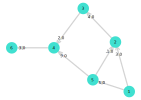

In [38]:
g = SimpleWeightedDiGraph(6)
add_edge!(g, 1, 2, 3)
add_edge!(g, 1, 5, 5)
add_edge!(g, 2, 3, 4)
add_edge!(g, 3, 4, 2)
add_edge!(g, 4, 6, 3)
add_edge!(g, 5, 2, -1)
add_edge!(g, 5, 4, 9)

# g = SimpleWeightedDiGraph(5)
# add_edge!(g, 1, 2, 9)
# add_edge!(g, 1, 3, 3)
# add_edge!(g, 2, 3, 6)
# add_edge!(g, 2, 5, 2)
# add_edge!(g, 3, 4, 1)
# add_edge!(g, 3, 2, 2)
# add_edge!(g, 4, 3, 2)
# add_edge!(g, 4, 5, 2)

nodelabel = 1:nv(g)
edgelabel = edges(g).iter.is[3]
gplot(g, nodelabel=nodelabel, edgelabel=edgelabel)

In [39]:
# https://en.wikipedia.org/wiki/Bellman%E2%80%93Ford_algorithm
function bellmanFord(graph, source)

    # Step 1: initialize graph
    d = fill(Inf, nv(graph)); # distance array
    p = fill(0, nv(graph)); # predecessor array
    d[source] = 0; # source's distance to source is null

    # Step 2: relax edges repeatedly
    for _ in 2:nv(graph)
        # println("test: ", k)
        for (v, u, w) in edges(graph).iter
            # println(u, " ", v, " ", w)
            if d[u] + w < d[v]
                d[v] = d[u] + w
                p[v] = u
            end
        end
    end

    # Step 3: check for negative-weight cycles
    for (v, u, w) in edges(graph).iter
        if d[u] + w < d[v]
            error("Graph contains a negative-weight cycle")
        end
    end

    return d, p
end
bellmanFord(g, 1)

([0.0, 3.0, 7.0, 9.0, 5.0, 12.0], [0, 1, 2, 3, 1, 4])